# Data-Visualisation, Titanic


In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns; 

In [16]:
train = pd.read_csv("data/train_clean.csv", sep=',')
test = pd.read_csv("data/test_clean.csv", sep =',')
survivant = train.where(train['Survived']==1).dropna()

Text(0.5, 0, 'Age')

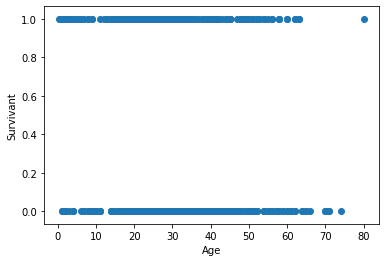

In [17]:
plt.scatter(train['Age'], train['Survived'])
plt.ylabel("Survivant")
plt.xlabel("Age")

Text(0.5, 0, 'Tarifs')

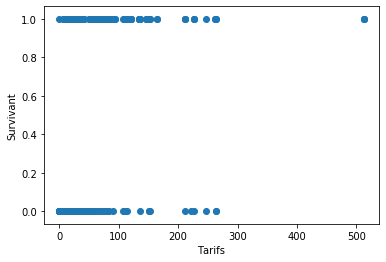

In [18]:
plt.scatter(train['Fare'], train['Survived'])
plt.ylabel("Survivant")
plt.xlabel("Tarifs")

### Le pourcentage de Personne ayant survécu a ce drâme 

([<matplotlib.patches.Wedge at 0x1b7185ca808>,
 [Text(-1.027562611392443, -0.392574935099458, 'Naufragés'),
  Text(1.1209773541493675, 0.4282636705165217, 'Survivants')],
 [Text(-0.5604886971231506, -0.21413178278152253, '61.6%'),
  Text(0.6539034565871309, 0.24982047446797095, '38.4%')])

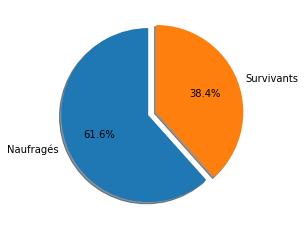

In [19]:
explode = (0, 0.1)
fig1, ax1 = plt.subplots()
ax1.pie(train['Survived'].value_counts(), explode=explode, labels=['Naufragés', 'Survivants'], autopct='%1.1f%%',
        shadow=True, startangle=90)

(array([109.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 233.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

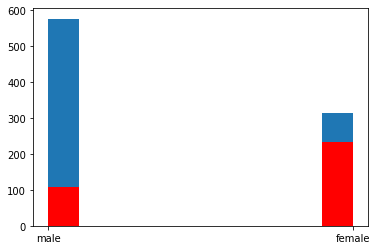

In [20]:
#Le sexe survivant
plt.hist(train['Sex'])
plt.hist(train['Sex'].where(train['Survived'] == 1).dropna(), color="r")

## Les Survivants par lieux d'embarquements

(array([219.,   0.,   0.,   0.,   0.,  93.,   0.,   0.,   0.,  30.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

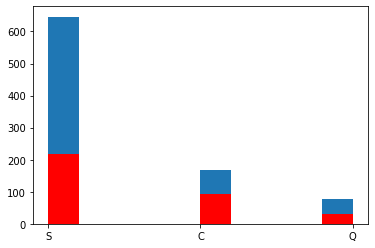

In [21]:
#L'endroit ou on embarqué les survivants 
plt.hist(train['Embarked'])
plt.hist(train['Embarked'].where(train['Survived'] == 1).dropna(), color="r")

###  Les classes sociales qui ont le plus survécu 
#### 1ere classe a gauche, 3 eme à droite

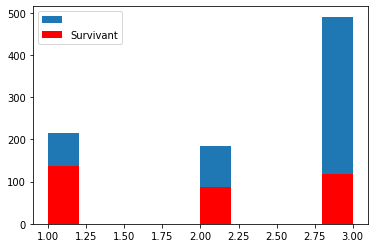

In [22]:
#Les classes sociales qui ont le plus survécu 
plt.hist(train['Pclass'])
plt.hist(train['Pclass'].where(train['Survived'] == 1).dropna(), color="r")
plt.legend(['','Survivant'])

#### Analyse :
<p>On peut observer ici que le nombre de survivant dans chaque catégorie social n'est pas équitable, on observe facilement que les personnes en 1ere classe on plus de la moitié de survivants,ce qui est bien superieur au taux de survivants des autres classes, qui se valent entre elles. </p>
<h4> Hypothese :</h4> La classe sociale, est elle un facteur de survie lors du crash du titanic ? 

### En Rouge Les enfants et les parents , trier par sexe , et en jaune ce qui ont survécu

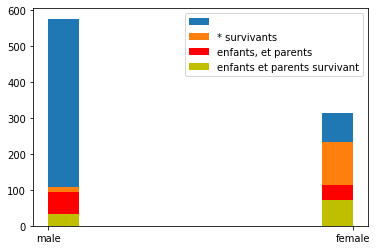

In [23]:
zz = pd.concat([train.where(train["Age"] < 18).dropna(), train.where(train["Parch"] > 1).dropna()])
plt.hist(train['Sex'])
plt.hist(train['Sex'].where(train['Survived']== 1).dropna())
plt.hist(zz['Sex'], color="r")
plt.hist(zz['Sex'].where(zz['Survived'] == 1 ).dropna(), color='y')
plt.legend(['','* survivants','enfants, et parents',"enfants et parents survivant"])

#### Analyse :
<p>On à ici une représentations les sexes sur le bateau, En rouge sont representés les enfants ou leur parents , la partie en jaune les survécus, en bleu la totalité des personnes sur le bateau. On peut voir ici que les meres et leur filles ont eu plus de chance de taux de survie que les peres et leurs fils. On observe que les taux sont plus ou moin proche des taux de survivants globaux. </p>
<h4> Hypothèses : </h4>Avoir un enfants ou l'ètre, augmentais t-il nos chance de survie lors du drame ? 

### Le Tarif du tickets en fonction des ages 
#### les survivants sont en violet 

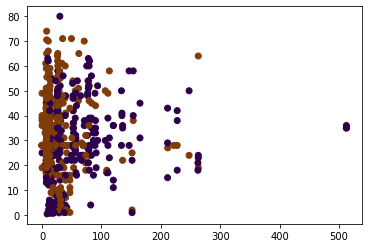

In [24]:
plt.scatter(train['Fare'], train['Age'], c=train['Survived'], cmap="PuOr")

#### Analyse :
<p>On Représentes les passagers du titanic en fonction de leur age et du tarif auquel ils ont payés leurs billets, on peut observer en violet les survivants, et on vois bien que plus le tarif du billet est elevée, plus les violets sont majoritaires. </p>
<h4> Hypothèses : </h4>Le tarifs du ticket avait-il une insidance sur la survie des passagers ? 

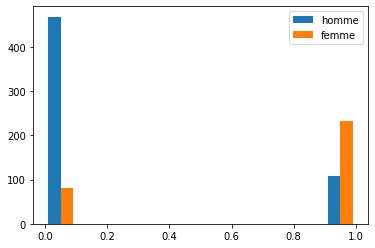

In [25]:
fem = train.where( train['Sex']=='female').dropna()
hom = train.where( train['Sex']=='male').dropna()
plt.hist([hom['Survived'],fem['Survived']])
plt.legend(['homme','femme'])

#### Analyse :
<p>On observe sur ce graphique la répartitions des hommes et des femmes en fonction de leur survie. on vois facilement que les femmes, ici en orange survive proportionnelement beaucoup plus que les hommes . </p>
<h4> Hypothèses : </h4> Les femmes ont elle significativement plus de chance de survivre que les hommes? 

## Matrice de Corrélations du Trains set

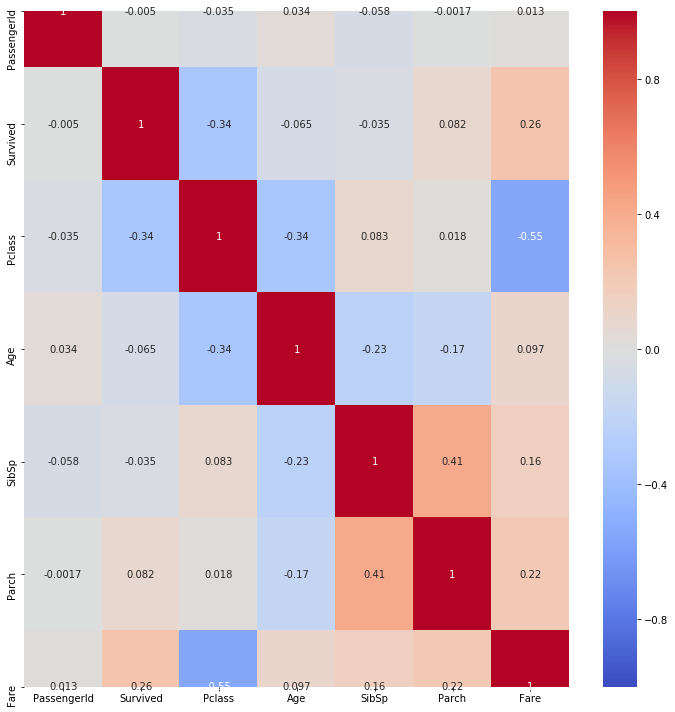

In [27]:
fig, ax = plt.subplots(figsize=(10,10))  
corr = train.corr()
ax =sns.heatmap(corr, annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')
plt.tight_layout()
plt.show()